# Plots for chapter 4 about Data

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import json
import numpy as np
import sys

sns.set(style="white")
%matplotlib inline


# Set the working directory to the src folder
os.chdir('/mnt/c/Dokumenter/Dokumenter/UNI/Master/Thesis/GitHub_Repo/Master_Thesis/data')


import sys
sys.path.insert(0, '../utils')
from Data_proc_utils.Data_proc_funcs import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.plotting_04_data import *


In [2]:
random_states = [1,2]
children_all = pd.read_csv('../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_balanced_df_1 = balance_child_data(children_all, print_stats=False, random_state=random_states[1])

adults_all = pd.read_csv('../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_balanced_df_1 = balance_adults_data_enrolled(children_balanced_df_1, adults_all, print_stats=False, random_state=random_states[0])


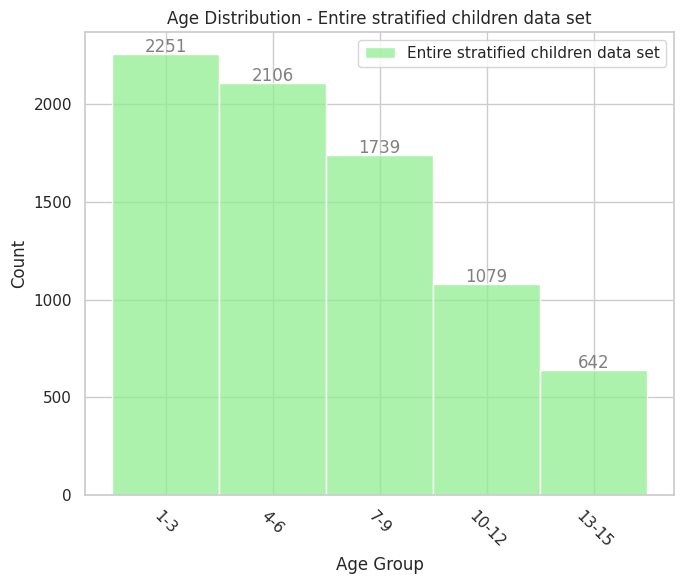

In [54]:


plot_demographic_distribution('children', children_all[children_all.Age <= 18], 'Entire stratified children data set', column="Age",color='lightgreen', bins=6, figsize=(7, 6))

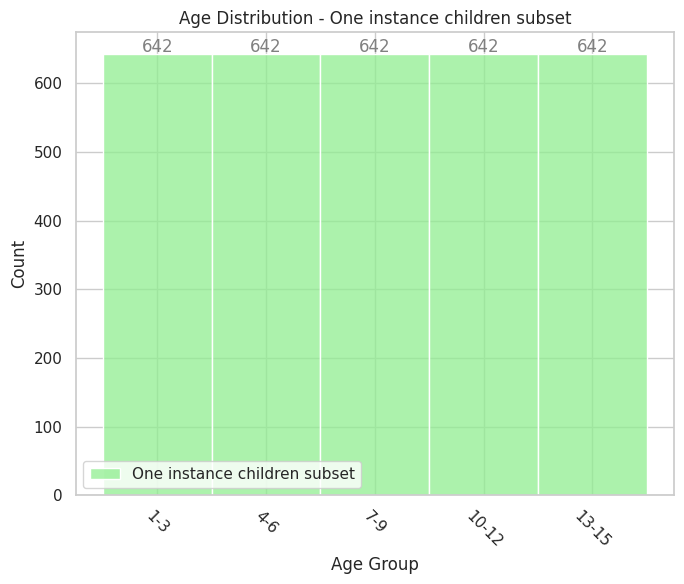

In [22]:
plot_demographic_distribution('children', children_balanced_df_1, 'One instance children subset', column="Age",color='lightgreen', bins=6, figsize=(7, 6))

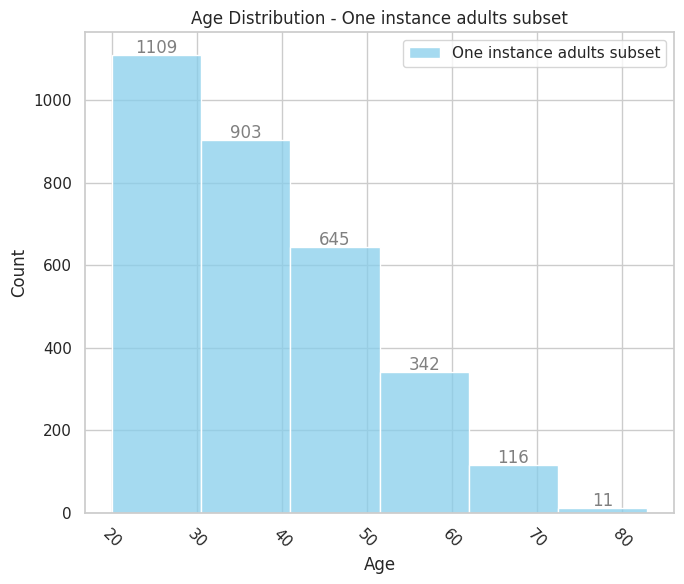

In [56]:
plot_demographic_distribution('adults', adults_balanced_df_1, 'One instance adults subset', column="Age",color='skyblue', bins=6, figsize=(7, 6))

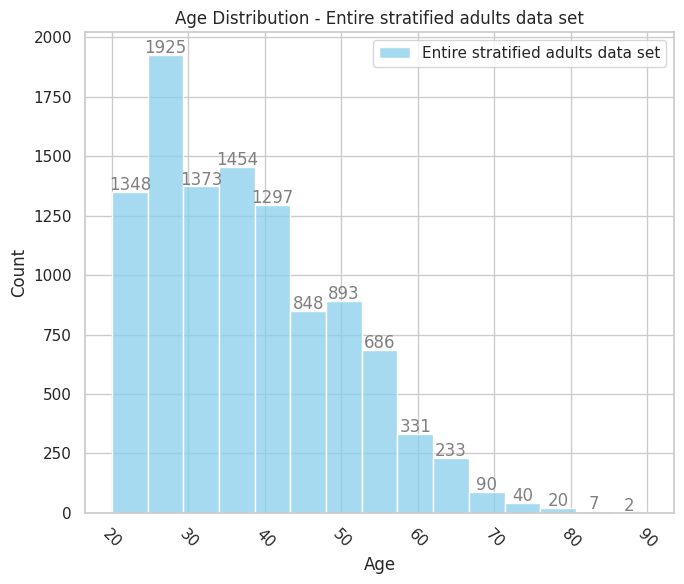

In [55]:
# plot_demographic_distribution('children', children_all[children_all.Age <= 18], 'Entire stratified children data set', column="Age",color='lightgreen', bins=6, figsize=(7, 6))
plot_demographic_distribution('adults', adults_all,'Entire stratified adults data set', column="Age",color='skyblue', bins=15,  figsize=(7, 6))

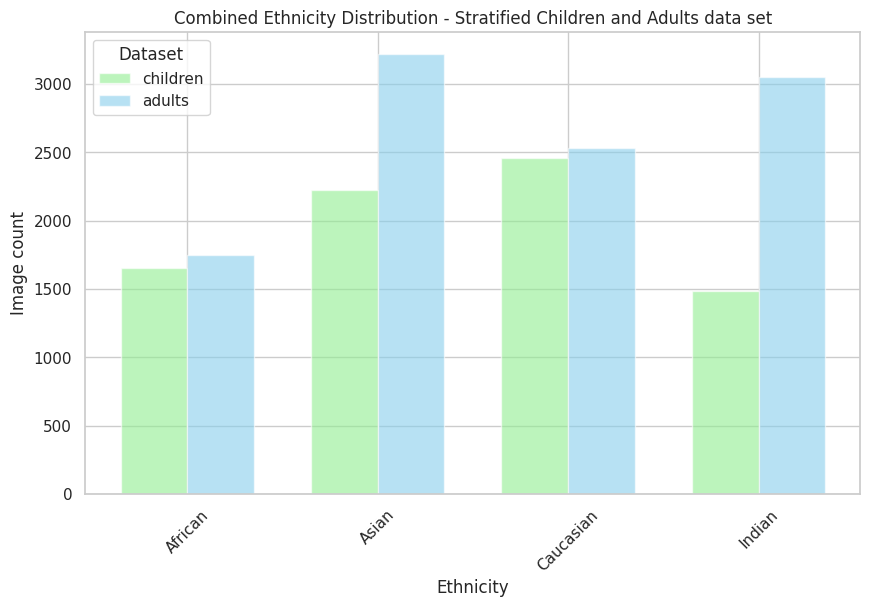

In [5]:
plot_combined_ethnicity_distribution(children_all, adults_all, 'children', 'adults', 'Stratified Children and Adults data set')

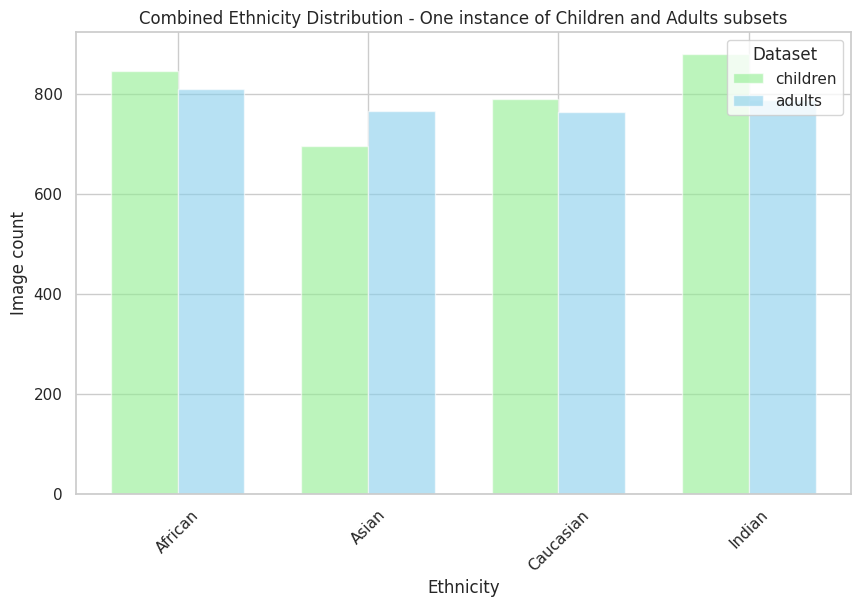

In [6]:
plot_combined_ethnicity_distribution(children_balanced_df_1, adults_balanced_df_1, 'children', 'adults', 'One instance of Children and Adults subsets')

In [32]:
# Mated and non-mated ids ###OBS
c_df = children_balanced_df_1
c_mates = c_df.groupby("identity_name").agg({'identity_name': ['count']})
c_mated_ids = c_mates[c_mates[('identity_name', 'count')] > 1].index


children_balanced_df_1['Enrolled'] = np.where(children_balanced_df_1['identity_name'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')


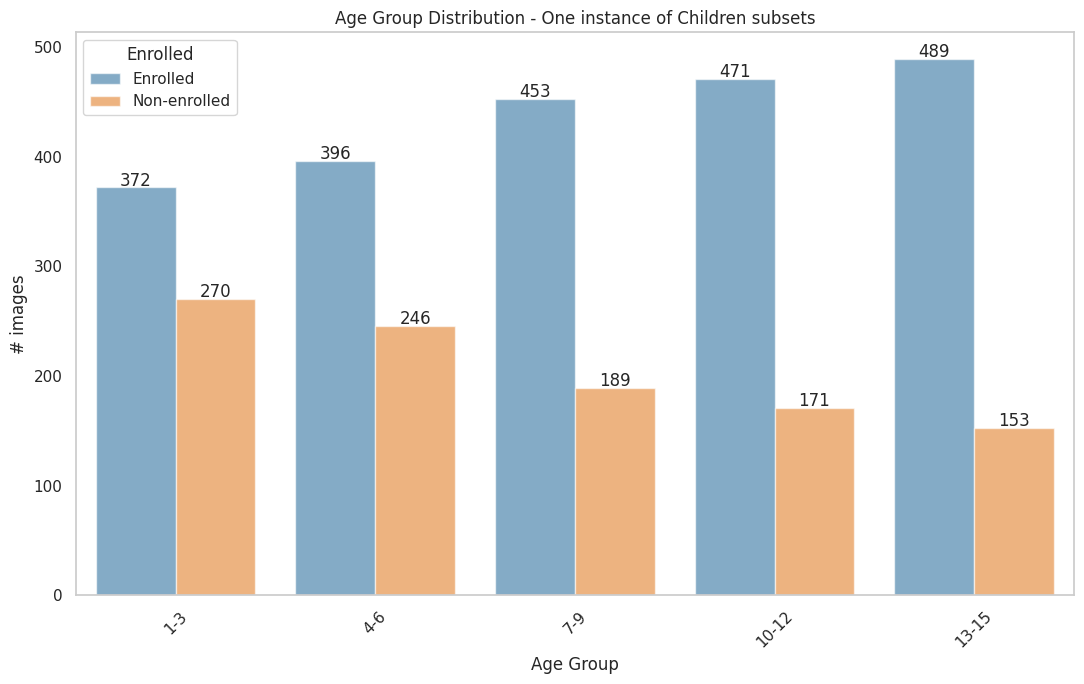

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,10,African_109/African_109_3.png,African_109_3,enrolled,African_109,African,13,African_109,10.0,100.0,78.0,100.0,13-15,Enrolled,13-15
1,16,African_113/African_113_0.png,African_113_0,enrolled,African_113,African,15,African_113,11.0,98.0,68.0,100.0,13-15,Enrolled,13-15
2,34,African_119/African_119_14.png,African_119_14,enrolled,African_119,African,15,African_119,15.0,100.0,96.0,100.0,13-15,Enrolled,13-15
3,48,African_121/African_121_2.png,African_121_2,enrolled,African_121,African,13,African_121,8.0,84.0,100.0,100.0,13-15,Enrolled,13-15
4,55,African_127/African_127_6.png,African_127_6,enrolled,African_127,African,15,African_127,21.0,100.0,80.0,100.0,13-15,Non-enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,6584,Indian_501/Indian_501_5.png,Indian_501_5,enrolled,Indian_501,Indian,11,Indian_501,30.0,99.0,98.0,100.0,10-12,Enrolled,10-12
3206,7461,Indian_337/Indian_337_0.png,Indian_337_0,non_enrolled,Indian_337,Indian,10,Indian_337,25.0,99.0,98.0,100.0,10-12,Non-enrolled,10-12
3207,7086,Indian_m.04y88mr/m.04y88mr_0003.jpg,m.04y88mr_0003,enrolled,m.04y88mr,Indian,12,m.04y88mr,15.0,93.0,100.0,100.0,10-12,Non-enrolled,10-12
3208,7787,Indian_m.05mzg5y/m.05mzg5y_0002.jpg,m.05mzg5y_0002,enrolled,m.05mzg5y,Indian,10,m.05mzg5y,72.0,88.0,99.0,100.0,10-12,Enrolled,10-12


In [8]:
plot_age_group_distribution_mated(children_balanced_df_1, 'One instance of Children subsets')


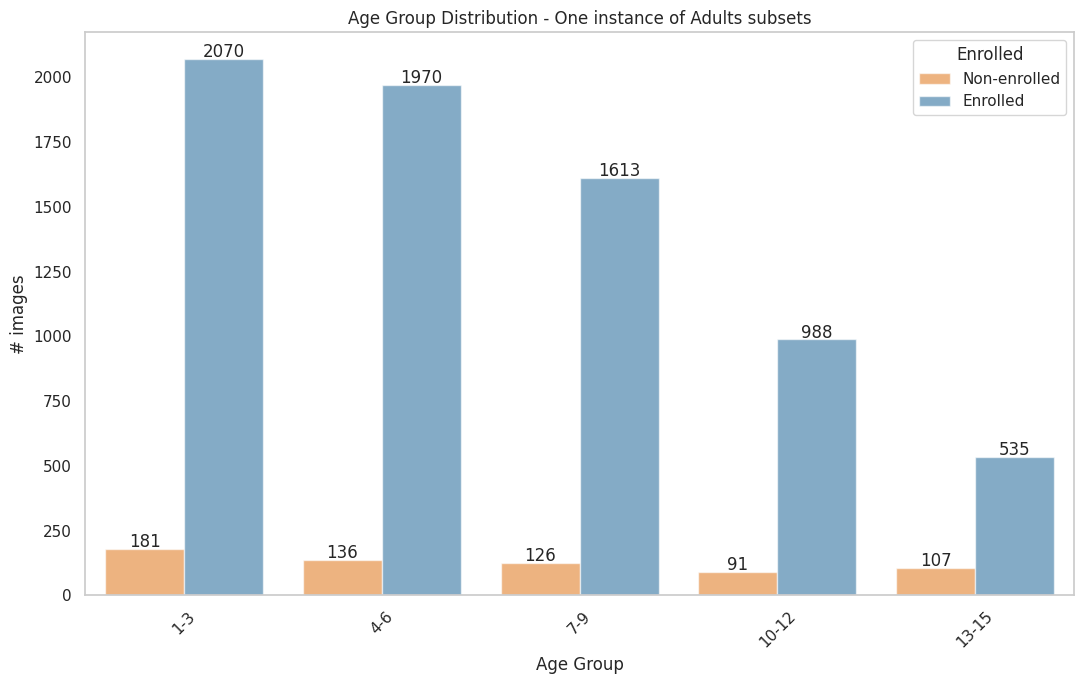

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,0,African_0/African_0_0.png,African_0_0,enrolled,African_0,African,7,African_0,34.0,100.0,93.0,100.0,7-9,Non-enrolled,7-9
1,1,African_1/African_1_11.png,African_1_11,enrolled,African_1,African,5,African_1,65.0,100.0,99.0,100.0,4-6,Enrolled,4-6
2,2,African_1/African_1_4.png,African_1_4,enrolled,African_1,African,2,African_1,23.0,95.0,99.0,100.0,1-3,Enrolled,1-3
3,3,African_10/African_10_1.png,African_10_1,enrolled,African_10,African,5,African_10,50.0,100.0,97.0,100.0,4-6,Enrolled,4-6
4,4,African_10/African_10_3.png,African_10_3,enrolled,African_10,African,6,African_10,25.0,90.0,100.0,100.0,4-6,Enrolled,4-6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7812,7812,Indian_m.0h9448x/m.0h9448x_0002.jpg,m.0h9448x_0002,enrolled,m.0h9448x,Indian,14,m.0h9448x,86.0,100.0,100.0,100.0,13-15,Enrolled,13-15
7813,7813,Indian_m.0hncksb/m.0hncksb_0003.jpg,m.0hncksb_0003,enrolled,m.0hncksb,Indian,11,m.0hncksb,20.0,96.0,94.0,100.0,10-12,Enrolled,10-12
7814,7814,Indian_m.0j63px2/m.0j63px2_0003.jpg,m.0j63px2_0003,enrolled,m.0j63px2,Indian,12,m.0j63px2,88.0,99.0,98.0,100.0,10-12,Enrolled,10-12
7815,7815,Indian_m.0j63px2/m.0j63px2_0004.jpg,m.0j63px2_0004,enrolled,m.0j63px2,Indian,15,m.0j63px2,24.0,64.0,98.0,99.0,13-15,Enrolled,13-15


In [14]:
# Mated and non-mated ids ###OBS
c_df = children_all
c_mates = c_df.groupby("identity_name").agg({'identity_name': ['count']})
c_mated_ids = c_mates[c_mates[('identity_name', 'count')] > 1].index


children_all['Enrolled'] = np.where(children_all['identity_name'].isin(c_mated_ids), 'Enrolled', 'Non-enrolled')
plot_age_group_distribution_mated(children_all, 'One instance of Adults subsets')


In [9]:
# Mated and non-mated ids ###OBS
a_df = adults_balanced_df_1
a_mates = a_df.groupby("identity_name").agg({'identity_name': ['count']})
a_mated_ids = a_mates[a_mates[('identity_name', 'count')] > 1].index


adults_balanced_df_1['Enrolled'] = np.where(adults_balanced_df_1['identity_name'].isin(a_mated_ids), 'Enrolled', 'Non-enrolled')


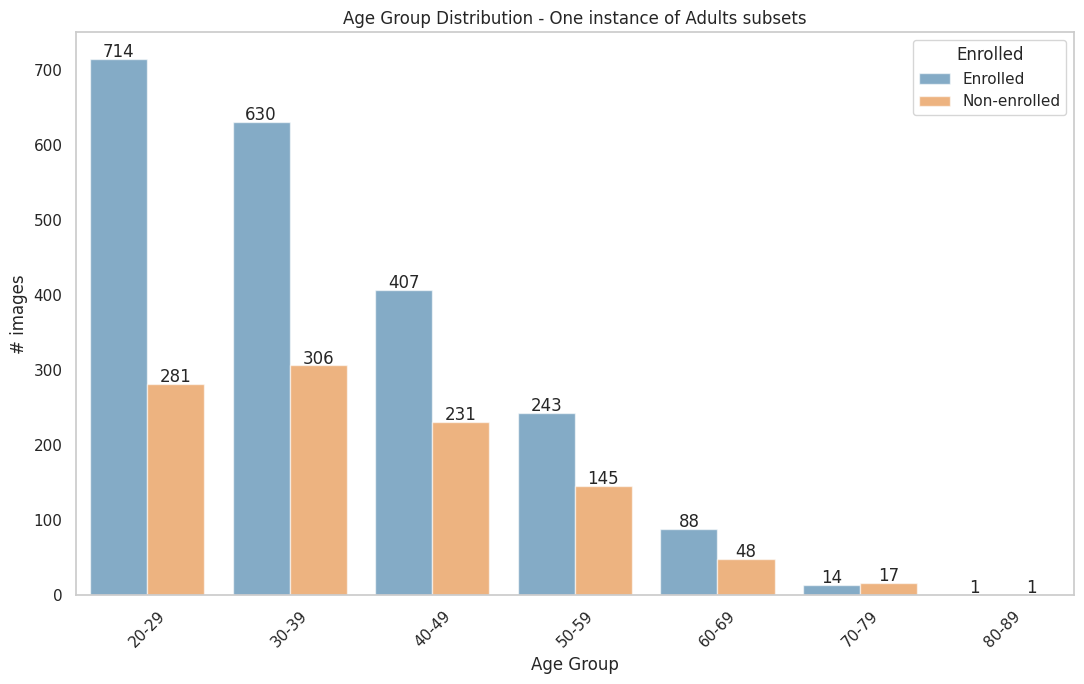

,Unnamed: 0,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,31,African_m.012mmb/m.012mmb_0001.jpg,m.012mmb_0001,m.012mmb,enrolled,African,31,m.012mmb,44,93,95,100,NaN,Enrolled,30-39
1,32,African_m.012mmb/m.012mmb_0002.jpg,m.012mmb_0002,m.012mmb,enrolled,African,30,m.012mmb,21,100,98,100,NaN,Enrolled,30-39
2,56,African_m.015pz3/m.015pz3_0001.jpg,m.015pz3_0001,m.015pz3,enrolled,African,65,m.015pz3,77,98,95,100,NaN,Enrolled,60-69
3,59,African_m.015pz3/m.015pz3_0004.jpg,m.015pz3_0004,m.015pz3,enrolled,African,58,m.015pz3,77,95,97,100,NaN,Enrolled,50-59
4,70,African_m.016j55/m.016j55_0002.jpg,m.016j55_0002,m.016j55,enrolled,African,34,m.016j55,16,98,99,100,NaN,Enrolled,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,31168,Indian_m.02vwkj_/m.02vwkj__0001.jpg,m.02vwkj__0001,m.02vwkj_,enrolled,Indian,49,m.02vwkj_,86,79,98,99,NaN,Non-enrolled,40-49
3122,31182,Indian_m.02vy1v1/m.02vy1v1_0004.jpg,m.02vy1v1_0004,m.02vy1v1,enrolled,Indian,40,m.02vy1v1,54,91,85,99,NaN,Non-enrolled,40-49
3123,31204,Indian_m.02w0b0f/m.02w0b0f_0002.jpg,m.02w0b0f_0002,m.02w0b0f,enrolled,Indian,38,m.02w0b0f,27,92,95,99,NaN,Non-enrolled,30-39
3124,31210,Indian_m.02w2_97/m.02w2_97_0003.jpg,m.02w2_97_0003,m.02w2_97,enrolled,Indian,53,m.02w2_97,36,93,100,100,NaN,Non-enrolled,50-59


In [10]:
plot_age_group_distribution_mated_adults(adults_balanced_df_1, 'One instance of Adults subsets')


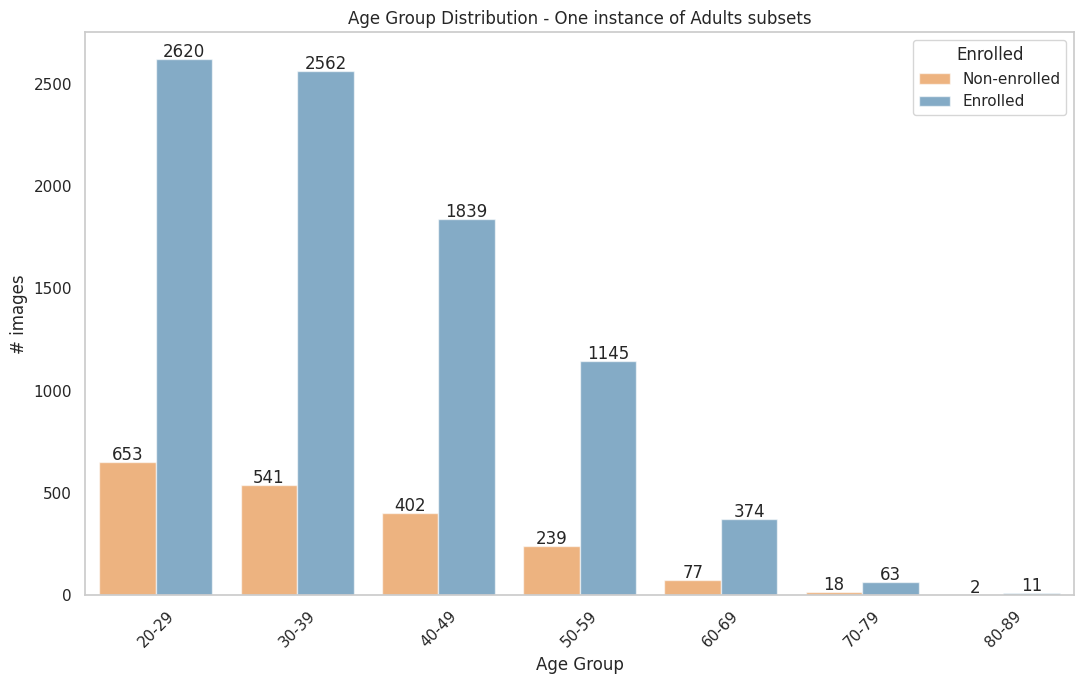

,Unnamed: 0,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Age Group,Enrolled
0,25,African_m.012mh_/m.012mh__0004.jpg,m.012mh__0004,m.012mh_,enrolled,African,24,m.012mh_,51,97,85,100,NaN,20-29,Non-enrolled
1,28,African_m.012mk7/m.012mk7_0001.jpg,m.012mk7_0001,m.012mk7,enrolled,African,33,m.012mk7,23,100,99,100,NaN,30-39,Non-enrolled
2,31,African_m.012mmb/m.012mmb_0001.jpg,m.012mmb_0001,m.012mmb,enrolled,African,31,m.012mmb,44,93,95,100,NaN,30-39,Enrolled
3,32,African_m.012mmb/m.012mmb_0002.jpg,m.012mmb_0002,m.012mmb,enrolled,African,30,m.012mmb,21,100,98,100,NaN,30-39,Enrolled
4,34,African_m.012qsp/m.012qsp_0001.jpg,m.012qsp_0001,m.012qsp,enrolled,African,25,m.012qsp,48,99,97,100,NaN,20-29,Non-enrolled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10542,39340,Indian_m.0sgg_cr/m.0sgg_cr_0004.jpg,m.0sgg_cr_0004,m.0sgg_cr,enrolled,Indian,29,m.0sgg_cr,35,100,97,100,NaN,20-29,Non-enrolled
10543,39345,Indian_m.0tj9/m.0tj9_0001.jpg,m.0tj9_0001,m.0tj9,enrolled,Indian,49,m.0tj9,75,100,96,100,NaN,40-49,Non-enrolled
10544,39353,Indian_m.0vshsz9/m.0vshsz9_0001.jpg,m.0vshsz9_0001,m.0vshsz9,enrolled,Indian,34,m.0vshsz9,87,96,100,100,NaN,30-39,Enrolled
10545,39354,Indian_m.0vshsz9/m.0vshsz9_0002.jpg,m.0vshsz9_0002,m.0vshsz9,enrolled,Indian,36,m.0vshsz9,81,96,100,100,NaN,30-39,Enrolled


In [15]:
# Mated and non-mated ids ###OBS
a_df = adults_all
a_mates = a_df.groupby("identity_name").agg({'identity_name': ['count']})
a_mated_ids = a_mates[a_mates[('identity_name', 'count')] > 1].index


adults_all['Enrolled'] = np.where(adults_all['identity_name'].isin(a_mated_ids), 'Enrolled', 'Non-enrolled')


plot_age_group_distribution_mated_adults(adults_all, 'One instance of Adults subsets')


In [17]:

def number_of_enrolled_ids_agebin(df, title, figsize=(11, 7)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [1, 4, 7, 10, 13, 16]
    age_labels = ['1-3', '4-6', '7-9', '10-12', '13-15']

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df


/tmp/ipykernel_11458/3171559406.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')


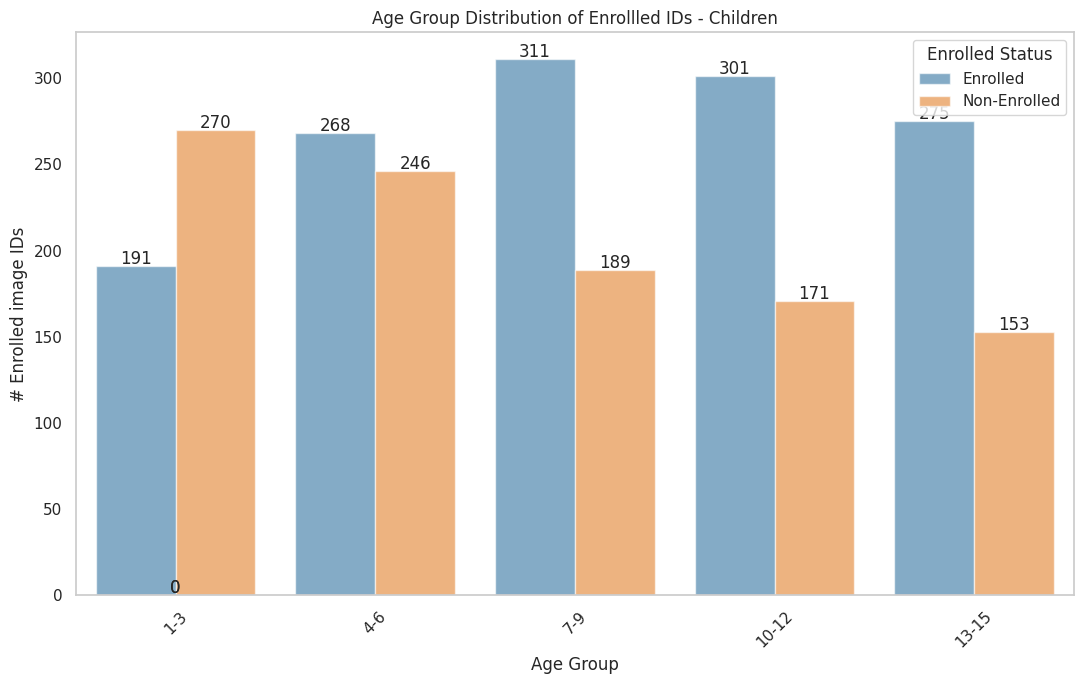

,Unnamed: 0,files_list,image_name,enrolled,identity_name,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,10,African_109/African_109_3.png,African_109_3,enrolled,African_109,African,13,African_109,10.0,100.0,78.0,100.0,13-15,Enrolled,13-15
1,16,African_113/African_113_0.png,African_113_0,enrolled,African_113,African,15,African_113,11.0,98.0,68.0,100.0,13-15,Enrolled,13-15
2,34,African_119/African_119_14.png,African_119_14,enrolled,African_119,African,15,African_119,15.0,100.0,96.0,100.0,13-15,Enrolled,13-15
3,48,African_121/African_121_2.png,African_121_2,enrolled,African_121,African,13,African_121,8.0,84.0,100.0,100.0,13-15,Enrolled,13-15
4,55,African_127/African_127_6.png,African_127_6,enrolled,African_127,African,15,African_127,21.0,100.0,80.0,100.0,13-15,Non-enrolled,13-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3205,6584,Indian_501/Indian_501_5.png,Indian_501_5,enrolled,Indian_501,Indian,11,Indian_501,30.0,99.0,98.0,100.0,10-12,Enrolled,10-12
3206,7461,Indian_337/Indian_337_0.png,Indian_337_0,non_enrolled,Indian_337,Indian,10,Indian_337,25.0,99.0,98.0,100.0,10-12,Non-enrolled,10-12
3207,7086,Indian_m.04y88mr/m.04y88mr_0003.jpg,m.04y88mr_0003,enrolled,m.04y88mr,Indian,12,m.04y88mr,15.0,93.0,100.0,100.0,10-12,Non-enrolled,10-12
3208,7787,Indian_m.05mzg5y/m.05mzg5y_0002.jpg,m.05mzg5y_0002,enrolled,m.05mzg5y,Indian,10,m.05mzg5y,72.0,88.0,99.0,100.0,10-12,Enrolled,10-12


In [19]:
number_of_enrolled_ids_agebin(children_balanced_df_1, 'Children')

/tmp/ipykernel_11458/159503358.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')


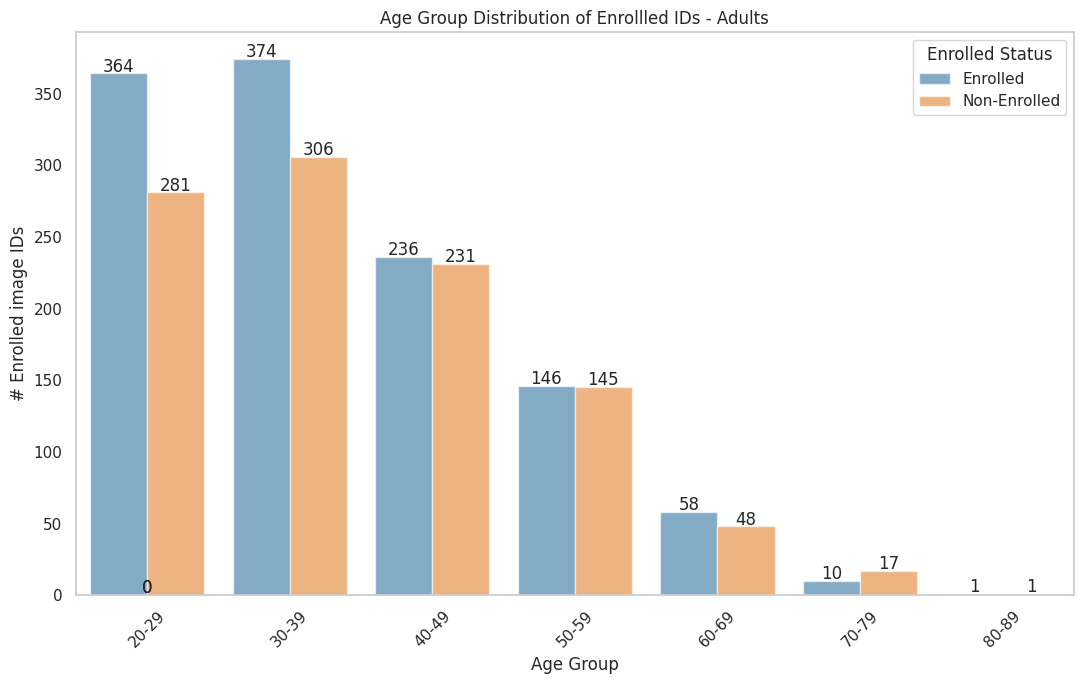

,Unnamed: 0,files_list,image_name,identity_name,enrolled,ethnicity,Age,Identity,UnifiedQualityScore.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,children_agegroup,Enrolled,Age Group
0,31,African_m.012mmb/m.012mmb_0001.jpg,m.012mmb_0001,m.012mmb,enrolled,African,31,m.012mmb,44,93,95,100,NaN,Enrolled,30-39
1,32,African_m.012mmb/m.012mmb_0002.jpg,m.012mmb_0002,m.012mmb,enrolled,African,30,m.012mmb,21,100,98,100,NaN,Enrolled,30-39
2,56,African_m.015pz3/m.015pz3_0001.jpg,m.015pz3_0001,m.015pz3,enrolled,African,65,m.015pz3,77,98,95,100,NaN,Enrolled,60-69
3,59,African_m.015pz3/m.015pz3_0004.jpg,m.015pz3_0004,m.015pz3,enrolled,African,58,m.015pz3,77,95,97,100,NaN,Enrolled,50-59
4,70,African_m.016j55/m.016j55_0002.jpg,m.016j55_0002,m.016j55,enrolled,African,34,m.016j55,16,98,99,100,NaN,Enrolled,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3121,31168,Indian_m.02vwkj_/m.02vwkj__0001.jpg,m.02vwkj__0001,m.02vwkj_,enrolled,Indian,49,m.02vwkj_,86,79,98,99,NaN,Non-enrolled,40-49
3122,31182,Indian_m.02vy1v1/m.02vy1v1_0004.jpg,m.02vy1v1_0004,m.02vy1v1,enrolled,Indian,40,m.02vy1v1,54,91,85,99,NaN,Non-enrolled,40-49
3123,31204,Indian_m.02w0b0f/m.02w0b0f_0002.jpg,m.02w0b0f_0002,m.02w0b0f,enrolled,Indian,38,m.02w0b0f,27,92,95,99,NaN,Non-enrolled,30-39
3124,31210,Indian_m.02w2_97/m.02w2_97_0003.jpg,m.02w2_97_0003,m.02w2_97,enrolled,Indian,53,m.02w2_97,36,93,100,100,NaN,Non-enrolled,50-59


In [21]:


def number_of_enrolled_ids_agebin(df, title, figsize=(11, 7)):
    """
    Plots the distribution of unique image IDs within the provided DataFrame,
    grouped by age bins and enrollment status, with specific colors for enrolled and non-enrolled.

    Parameters:
    - df: Pandas DataFrame containing 'Age' and 'im_id' columns.
    - title: str
        The title for the plot.
    - figsize: tuple, optional, default (10, 6)
        The dimensions for the figure size.
    """
    # Ensure 'Age' is of type integer
    df['Age'] = df['Age'].astype(int)

    # Define the age groups and corresponding labels
    age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
    age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']

    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}

    # Update the DataFrame with age groupings
    df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

    # Filter out any NaN values that might have been introduced in the 'Age Group' column
    df = df.dropna(subset=['Age Group'])

    # Group by 'Age Group' and 'Enrolled', then count unique 'im_id'
    age_enrolled_counts = df.groupby(['Age Group', 'Enrolled'])['identity_name'].nunique().reset_index(name='Count')

    # Define the colors for the plot
    # enrolled_palette = {'Enrolled': 'cornflowerblue', 'Non-enrolled': 'orange'}
    # Define the colors for the plot
    enrolled_palette = {'Enrolled': '#1f77b4', 'Non-enrolled': '#ff7f0e'}




    # Create the bar plot for the age groups with count of unique image IDs
    plt.figure(figsize=figsize)
    ax = sns.barplot(data=age_enrolled_counts, x='Age Group', y='Count', hue='Enrolled', palette=enrolled_palette, alpha = 0.6)

    plt.title(f"Age Group Distribution of Enrollled IDs - {title}")
    plt.xlabel("Age Group")
    plt.ylabel("# Enrolled image IDs")
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Customize the legend
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ["Enrolled", "Non-Enrolled"], title='Enrolled Status')

    # Add value counts to the top of each bar
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 5), textcoords='offset points')

    # Show the plot
    plt.tight_layout()
    plt.show()

    return df

number_of_enrolled_ids_agebin(adults_balanced_df_1, 'Adults')

# Count to fill the table

In [ ]:
def group_and_count_enrolled(df):
    grouped_counts = df.groupby('identity_name')['Enrolled'].value_counts().unstack(fill_value=0)
    return grouped_counts

grouped_counts = group_and_count_enrolled(adults_balanced_df_1)
display(grouped_counts)

grouped_counts['Non-enrolled'].value_counts()


Enrolled,Enrolled,Non-enrolled
identity_name,,
m.01167d3z,0,1
m.01241v,0,1
m.0125mr,0,1
m.012fgx,0,1
m.012mh_,0,1
...,...,...
m.0rpfvjc,2,0
m.0rpj1kv,2,0
m.0vy1h4f,2,0


Non-enrolled
1    1029
0     808
Name: count, dtype: int64

In [ ]:
# len(adults_balanced_df_1.identity_name.unique())
len(children_balanced_df_1.identity_name.unique())